# Bài tập 1
Kỹ thuật đọc và xử lý dữ liệu từ file .csv

In [898]:
# dataset
import numpy as np 
import matplotlib.pyplot as plt 
import random

def get_column(data, index):
    result = []
    for i in range(len(data)):
        result.append(data[i][index])
    return result

def prepare_data(file_name_dataset):
    data = np.genfromtxt(file_name_dataset, delimiter=',', skip_header=1).tolist()
    N = len(data)

    # get tv (index=0)
    tv_data = get_column(data, 0)

    # get radio (index=1)
    radio_data = get_column(data, 1)

    # get newspaper (index=2)
    newspaper_data = get_column(data, 2)

    # get sales (index=3)
    sales_data = get_column(data, 3)

    # building X input and y output for training
    X = [tv_data, radio_data, newspaper_data]
    y = sales_data
    return X,y

In [899]:
# Question 1
X,y = prepare_data('advertising.csv')
list = [sum(X[0][:5]), sum(X[1][:5]), sum(X[2][:5]), sum(y[:5])]
print(list)

[624.1, 175.10000000000002, 300.5, 78.9]


# Bài tập 2
Kỹ thuật huấn luyện data dùng one sample - linear regression

## 2.1

Hoàn thành function **initialize_params()** để khởi tạo ngẫu nhiên giá trị ban đầu cho w1, w2, w3 theo gaussian random.gauss(mu=0.0, sigma=0.01) và b = 0

In [900]:
def initialize_params():
    w1 = random.gauss(mu=0.0, sigma=0.01)
    w2 = random.gauss(mu=0.0, sigma=0.01)
    w3 = random.gauss(mu=0.0, sigma=0.01)
    b = 0
    return w1, w2, w3, b

Vì để thống nhất việc đánh giá kết quả cho toàn bài tập trong module này, khởi tạo cố định wi, b như sau

In [901]:
# Khởi tạo cụ thể để làm bài tập

def initialize_params():
    w1, w2, w3, b = (0.016992259082509283, 0.0070783670518262355, -0.002307860847821344, 0)
    return w1, w2, w3, b

## 2.2

Hoàn thành function **predict(x1, x2, x3, w1, w2, w3, b)** để trả về kết quả dự đoán y tương ứng

In [902]:
def predict(x1, x2, x3, w1, w2, w3, b):
    result = x1*w1 + x2*w2 + x3*w3 + b
    return result

In [903]:
# Question 2
y_test = predict(x1=1, x2=1, x3=1, w1=0, w2=0.5, w3=0, b=0.5)
print(y_test)

1.0


## 2.3

Hoàn thành function **compute_loss(y_hat, y)** để tính loss giữa kết quả dự đoán y_hat và giá trị thực y, sử dụng Mean Squared Error

In [904]:
def compute_loss_mse(y_hat, y):

    loss = (y_hat - y) ** 2

    return loss

In [905]:
# Question 3
l = compute_loss_mse(y_hat=1, y=0.5)
print(l)

0.25


## 2.4

Hoàn thành function **compute_gradient_wi(xi, y, y_hat)** để tính đạo hàm của hàm loss $L = (\hat{y} - y)^2$ theo wi và function **compute_gradient_b(y, y_hat)** để tính đạo hàm của hàm loss $L = (\hat{y} - y)^2$ theo b

In [906]:
# compute gradient
def compute_gradient_wi(xi, y, y_hat):

    dl_dwi = 2 * xi * (y_hat - y)

    return dl_dwi

def compute_gradient_b(y, y_hat):

    dl_db = 2 * (y_hat - y)

    return dl_db

In [907]:
# Question 4
g_wi = compute_gradient_wi(xi=1.0, y=1.0, y_hat=0.5)
print(g_wi)

-1.0


In [908]:
# Question 5:
g_b = compute_gradient_b(y=2.0, y_hat=0.5)
print(g_b)

-3.0


## 2.5

Hoàn thành function **update_weight_wi(wi, dl_dwi, lr)** để cập nhật wi sau khi tính đạo làm hàm loss L theo wi, và function **update_weight_b(b, dl_db, lr)** để update bias (b) sau khi tính đạo làm hàm loss L theo b

In [909]:
# update weights
def update_weight_wi(wi, dl_dwi, lr):

    wi = wi - dl_dwi * lr

    return wi

def update_weight_b(b, dl_db, lr):

    b = b - dl_db * lr

    return b

In [910]:
# Question 6
after_wi = update_weight_wi(wi=1.0, dl_dwi=-0.5, lr=1e-5)
print(after_wi)

1.000005


In [911]:
# Question 7
after_b = update_weight_b(b=0.5, dl_db=-1.0, lr=1e-5)
print(after_b)

0.50001


## 2.6

Thực hiện huấn luyện data bằng cách gọi hàm **implement_linear_regression(X, y)** và vẽ đồ thị kết quả cho 100 giá trị loss đầu tiên (loss cho 100 lần cập nhật đầu tiên)

In [912]:
def implement_linear_regression(X_data, y_data, epoch_max = 50, lr = 1e-5):
    losses = []
    
    w1, w2, w3, b = initialize_params()

    N = len(y_data)
    
    for epoch in range(epoch_max):
        for i in range(N):
            # get a sample
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]

            y = y_data[i]

            # computee output
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            # compute loss
            loss = compute_loss_mse(y, y_hat)

            # compute gradient w1, w2, w3, b
            dl_dw1 = compute_gradient_wi(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi(x3, y, y_hat)
            dl_db = compute_gradient_b(y, y_hat)

            # update parameters
            w1 = update_weight_wi(w1, dl_dw1, lr)
            w2 = update_weight_wi(w2, dl_dw2, lr)
            w3 = update_weight_wi(w3, dl_dw3, lr)
            b = update_weight_b(b, dl_db, lr)

            # logging
            losses.append(loss)

    return (w1, w2, w3, b, losses)

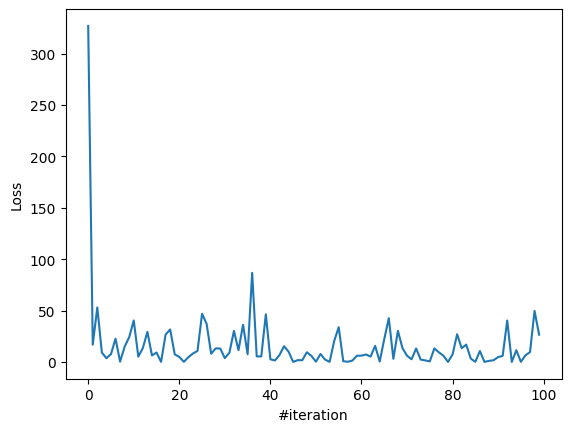

In [913]:
(w1, w2, w3, b, losses) = implement_linear_regression(X,y)
plt.plot(losses[:100])
plt.xlabel("#iteration")
plt.ylabel("Loss")
plt.show()

In [914]:
# Question 8
X,y = prepare_data('advertising.csv')
(w1,w2,w3,b,losses) = implement_linear_regression(X,y)
print(w1,w2,w3)

0.07405984066396477 0.15917360263437663 0.017561197559948935


In [915]:
# Question 9

# given new data
tv = 19.2
radio = 35.9
newspaper = 51.3

X,y = prepare_data('advertising.csv')
(w1,w2,w3,b,losses) = implement_linear_regression(X, y, epoch_max=50, lr=1e-5)
sales = predict(tv, radio, newspaper, w1, w2, w3, b)
print(f'predicted sales is {sales}')

predicted sales is 8.176413319549823


## 2.7

Thực hiện huấn luyện data bằng cách thay thế hàm loss $L = (\hat{y} - y)^2$ bằng hàm loss MAE $L = |\hat{y} − y|$ và vẽ đồ thị kết quả hàm loss trong 100 interation đầu tiên

In [916]:
# Question 10
def compute_loss_mae(y_hat, y):
    result = abs(y_hat - y)
    return result

l = compute_loss_mae(y_hat=1, y=0.5)
print(l)

0.5


# Bài tập 3

Kỹ thuật huấn luyện data dùng batch N samples - linear regression

In [917]:
def implement_linear_regression_nsamples(X_data, y_data, epoch_max=50, lr=1e-5):
    losses = []

    w1, w2, w3, b = initialize_params()
    N = len(y_data)

    for epoch in range(epoch_max):

        loss_total = 0
        dw1_total = 0
        dw2_total = 0
        dw3_total = 0
        db_total = 0

        for i in range(N):
            # get a sample
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]

            y = y_data[i]

            # compute output
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            # compute loss
            loss = compute_loss_mse(y_hat, y)

            # accumulate loss
            loss_total = loss_total + loss
            
            # compute gradient w1, w2, w3, b
            dl_dw1 = compute_gradient_wi(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi(x3, y, y_hat)
            dl_db = compute_gradient_b(y, y_hat)

            # accumulate gradient w1, w2, w3, b
            dw1_total = dw1_total + dl_dw1
            dw2_total = dw2_total + dl_dw2
            dw3_total = dw3_total + dl_dw3
            db_total = db_total + dl_db
        
        # (after processing N samples) - update parameters
        
        w1 = update_weight_wi(w1, dw1_total/N, lr)
        w2 = update_weight_wi(w2, dw2_total/N, lr)
        w3 = update_weight_wi(w3, dw3_total/N, lr)
        b = update_weight_b(b, db_total/N, lr)

        # logging
        losses.append(loss_total/N)
    return (w1, w2, w3, b, losses)

[172.98395547828923, 39.4081674745134, 18.15746728564735, 14.634633779162357, 13.913880074022757, 13.640049637323427, 13.441395294810789, 13.259118517018994, 13.083802587178743, 12.913826664416215, 12.748804182322559, 12.58854742072041, 12.432904005847659, 12.281730988201284, 12.134890631437667, 11.992249630675893, 11.853678875589457, 11.719053303032835, 11.588251767260099, 11.461156916275085, 11.33765507239911, 11.217636116651946, 11.100993376782947, 10.987623518830576, 10.877426442098113, 10.77030517743778, 10.666165788738786, 10.564917277518694, 10.466471490519933, 10.370743030217112, 10.277649168143098, 10.187109760945372, 10.099047169086274, 10.013386178104167, 9.930053922354572, 9.848979811153313, 9.770095457245782, 9.69333460752933, 9.61863307595747, 9.545928678557278, 9.475161170493593, 9.406272185115144, 9.339205174920474, 9.273905354383018, 9.210319644576826, 9.148396619546123, 9.088086454363877, 9.029340874825948, 8.972113108729593, 8.916357838686066, 8.86203115641928, 8.809

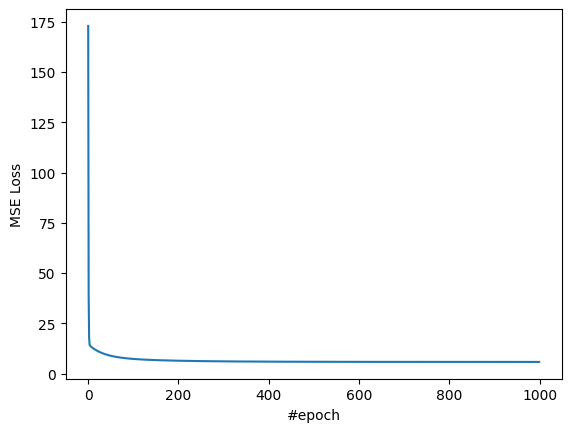

In [918]:
(w1, w2, w3, b, losses) = implement_linear_regression_nsamples(X, y, epoch_max=1000, lr=1e-5)
print(losses)
plt.plot(losses)
plt.xlabel("#epoch")
plt.ylabel("MSE Loss")
plt.show()

In [919]:
# Question 11
X,y = prepare_data('advertising.csv')
# using MSE loss
(w1, w2, w3, b, losses) = implement_linear_regression_nsamples(X, y, epoch_max=1000, lr=1e-5)
print(w1, w2, w3)

0.06710990754044266 0.15756173831487585 0.029619799386084403


# Bài tập 4

In [920]:
def prepare_data(file_name_dataset):
    data = np.genfromtxt(file_name_dataset, delimiter=',', skip_header=1).tolist()
    
    # get tv (index=0)
    tv_data = get_column(data, 0)

    # get radio (index=1)
    radio_data = get_column(data, 1)

    # get newspaper (index=2)
    newspaper_data = get_column(data, 2)

    # get sales (index=3)
    sales_data = get_column(data, 3)

    # building X input and y output for training
    # Create list of features for input
    X = [[1, x1, x2, x3] for x1, x2, x3 in zip(tv_data, radio_data, newspaper_data)]
    y = sales_data
    return X,y

In [921]:
def initialize_params():
    bias = 0
    w1 = random.gauss(mu=0.0, sigma=0.01)
    w2 = random.gauss(mu=0.0, sigma=0.01)
    w3 = random.gauss(mu=0.0, sigma=0.01)
    
    # return [bias, w1, w2, w3]
    return [0, -0.01268850433497871, 0.004752496982185252, 0.0073796171538643845]

In [922]:
# Predict output by using y = x0*b + x1*w1 + x2*w2 + x3*w3

def predict(X_feature, weights):

    result = 0
    for i in range(len(weights)):
        result = result + X_feature[i] * weights[i]

    return result

def comput_loss(y_hat, y):
    return (y_hat - y) ** 2

# compute gradient
def compute_gradient_w(X_features, y, y_hat):

    dl_dweights = [2 * wi * (y_hat - y) for wi in X_features]

    return dl_dweights

# update weights
def update_weight(weights, dl_dweights, lr):

    weights = [weights[i] - lr * dl_dweights[i] for i in range(len(weights))]

    return weights

epoch 0
epoch 1
epoch 2
epoch 3
epoch 4
epoch 5
epoch 6
epoch 7
epoch 8
epoch 9
epoch 10
epoch 11
epoch 12
epoch 13
epoch 14
epoch 15
epoch 16
epoch 17
epoch 18
epoch 19
epoch 20
epoch 21
epoch 22
epoch 23
epoch 24
epoch 25
epoch 26
epoch 27
epoch 28
epoch 29
epoch 30
epoch 31
epoch 32
epoch 33
epoch 34
epoch 35
epoch 36
epoch 37
epoch 38
epoch 39
epoch 40
epoch 41
epoch 42
epoch 43
epoch 44
epoch 45
epoch 46
epoch 47
epoch 48
epoch 49


<function matplotlib.pyplot.show(close=None, block=None)>

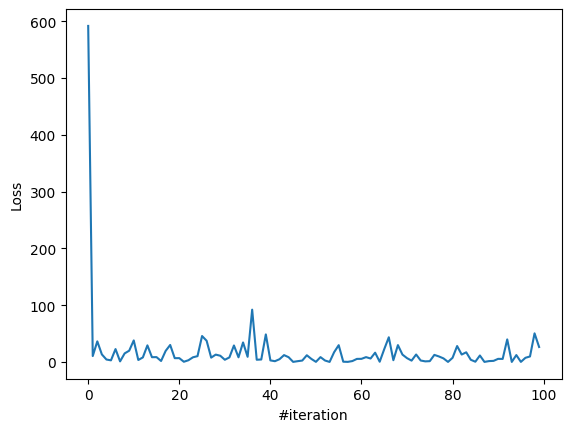

In [923]:
def implement_linear_regression(X_feature, y_output, epoch_max=50, lr=1e-5):

    losses = []
    weights = initialize_params()
    N = len(y_output)
    for epoch in range(epoch_max):
        print("epoch", epoch)
        for i in range(N):
            # get a sample - row i
            features_i = X_feature[i]
            y = y_output[i]

            # compute output
            y_hat = predict(features_i, weights)

            # compute loss
            loss = compute_loss_mse(y_hat, y)

            # compute gradient w1, w2, w3, b
            dl_dweights = compute_gradient_w(features_i, y, y_hat)

            # update parameters
            weights = update_weight(weights, dl_dweights, lr)

            # logging
            losses.append(loss)
    return weights, losses

X,y = prepare_data('advertising.csv')
W,L = implement_linear_regression(X,y)
plt.plot(L[0:100])
plt.xlabel("#iteration")
plt.ylabel("Loss")
plt.show

In [924]:
# Question 12
X,y = prepare_data('advertising.csv')
W,L = implement_linear_regression(X, y, epoch_max=50, lr=1e-5)
# Print loss value at iteration 9999
print(L[9999])

epoch 0
epoch 1
epoch 2
epoch 3
epoch 4
epoch 5
epoch 6
epoch 7
epoch 8
epoch 9
epoch 10
epoch 11
epoch 12
epoch 13
epoch 14
epoch 15
epoch 16
epoch 17
epoch 18
epoch 19
epoch 20
epoch 21
epoch 22
epoch 23
epoch 24
epoch 25
epoch 26
epoch 27
epoch 28
epoch 29
epoch 30
epoch 31
epoch 32
epoch 33
epoch 34
epoch 35
epoch 36
epoch 37
epoch 38
epoch 39
epoch 40
epoch 41
epoch 42
epoch 43
epoch 44
epoch 45
epoch 46
epoch 47
epoch 48
epoch 49
31.339223408109948


# Bài tập 5

Kỹ thuật Feature Scaling thông qua min and max

In [925]:
def min_max_scaling(data1, data2, data3):
    max_data_1 = max(data1)
    max_data_2 = max(data2)
    max_data_3 = max(data3)

    min_data_1 = min(data1)
    min_data_2 = min(data2)
    min_data_3 = min(data3)
    
    data1 = [(x - min_data_1) / (max_data_1 - min_data_1) for x in data1]
    data2 = [(x - min_data_2) / (max_data_2 - min_data_2) for x in data2]
    data3 = [(x - min_data_3) / (max_data_3 - min_data_3) for x in data3]
    
    return (data1, data2, data3), (max_data_1, max_data_2, max_data_3, min_data_1, min_data_2, min_data_3)

In [926]:
def prepare_data(file_name_dataset):
    data = np.genfromtxt(file_name_dataset, delimiter=',', skip_header=1).tolist()

    # get tv (index = 0)
    tv_data = get_column(data, 0)

    # get radio (index = 1)
    radio_data = get_column(data, 1)

    # get newspaper (index = 2)
    newspaper_data = get_column(data, 2)

    # get sales (index = 3)
    sales_data = get_column(data, 3)

    # scale data (only for features)
    # remember to scale input features in inference, therefore, we need to save max, min, values
    print("tv_data_old", tv_data)
    print("radio_data_old", radio_data)
    print("newspaper_data_old", newspaper_data)
    (tv_data, radio_data, newspaper_data), (max_data_1, max_data_2, max_data_3, min_data_1, min_data_2, min_data_3) = min_max_scaling(tv_data, radio_data, newspaper_data)
    print("tv_data_new", tv_data)
    print("radio_data_new", radio_data)
    print("newspaper_data_new", newspaper_data)
    # building X input and y output for training
    # Create a list of features for input
    X = [[1, x1, x2, x3] for x1, x2, x3 in zip(tv_data, radio_data, newspaper_data)]
    y = sales_data
    return X,y

tv_data_old [230.1, 44.5, 17.2, 151.5, 180.8, 8.7, 57.5, 120.2, 8.6, 199.8, 66.1, 214.7, 23.8, 97.5, 204.1, 195.4, 67.8, 281.4, 69.2, 147.3, 218.4, 237.4, 13.2, 228.3, 62.3, 262.9, 142.9, 240.1, 248.8, 70.6, 292.9, 112.9, 97.2, 265.6, 95.7, 290.7, 266.9, 74.7, 43.1, 228.0, 202.5, 177.0, 293.6, 206.9, 25.1, 175.1, 89.7, 239.9, 227.2, 66.9, 199.8, 100.4, 216.4, 182.6, 262.7, 198.9, 7.3, 136.2, 210.8, 210.7, 53.5, 261.3, 239.3, 102.7, 131.1, 69.0, 31.5, 139.3, 237.4, 216.8, 199.1, 109.8, 26.8, 129.4, 213.4, 16.9, 27.5, 120.5, 5.4, 116.0, 76.4, 239.8, 75.3, 68.4, 213.5, 193.2, 76.3, 110.7, 88.3, 109.8, 134.3, 28.6, 217.7, 250.9, 107.4, 163.3, 197.6, 184.9, 289.7, 135.2, 222.4, 296.4, 280.2, 187.9, 238.2, 137.9, 25.0, 90.4, 13.1, 255.4, 225.8, 241.7, 175.7, 209.6, 78.2, 75.1, 139.2, 76.4, 125.7, 19.4, 141.3, 18.8, 224.0, 123.1, 229.5, 87.2, 7.8, 80.2, 220.3, 59.6, 0.7, 265.2, 8.4, 219.8, 36.9, 48.3, 25.6, 273.7, 43.0, 184.9, 73.4, 193.7, 220.5, 104.6, 96.2, 140.3, 240.1, 243.2, 38.0, 44.7, 

<function matplotlib.pyplot.show(close=None, block=None)>

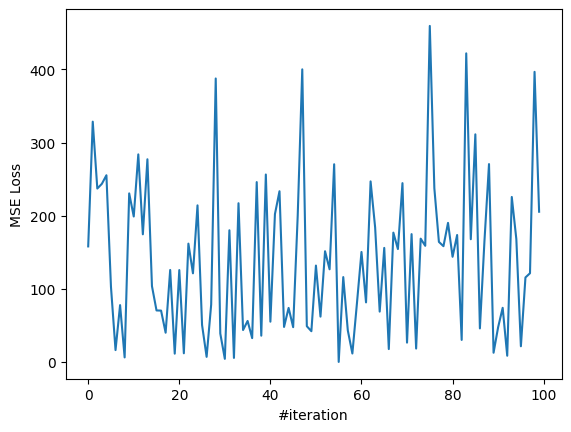

In [927]:
X,y = prepare_data('advertising.csv')
W,L = implement_linear_regression(X,y)
plt.plot(L[-100:])
plt.xlabel("#iteration")
plt.ylabel("MSE Loss")
plt.show